In [37]:
import tensorflow as tf
from sklearn.datasets import make_classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np

# Generate a simple binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                            n_clusters_per_class=1, class_sep=1.5, random_state=42)
y = y.reshape(-1, 1)  # Reshape y to be compatible with Keras

# Define a simple perceptron model
model = Sequential([
    Dense(3, activation='tanh'),  # Single perceptron
    Dense(3, activation='tanh'),  # Single perceptron
    Dense(3, activation='tanh')
])

# Compile the model
optimizer = SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

# Train the model for one epoch
model.fit(X, y, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5178 - loss: 0.7573  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4800 - loss: 0.0917 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5522 - loss: 0.0423 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5083 - loss: 0.0285 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5187 - loss: 0.0206 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4649 - loss: 0.0157 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4280 - loss: 0.0127 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5326 - loss: 0.0091 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4562 - loss: 0.0089 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5091 - loss: 0.0075 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3722 - loss: 0.0069 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [38]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (10, 3)                │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (10, 3)                │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (10, 3)                │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35 (144.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [39]:
x_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
with tf.GradientTape() as t:
    t.watch(x_tensor)
    output = model(x_tensor)

result = output
gradients = t.gradient(output, x_tensor).numpy()
preds = model.predict(X)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


(array([[40., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.],
        [39., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.],
        [39., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.]]),
 array([-0.08436415,  0.02200768,  0.12837949,  0.23475133,  0.34112313,
         0.44749498,  0.5538668 ,  0.66023862,  0.76661044,  0.87298226,
         0.97935408]),
 <a list of 3 BarContainer objects>)

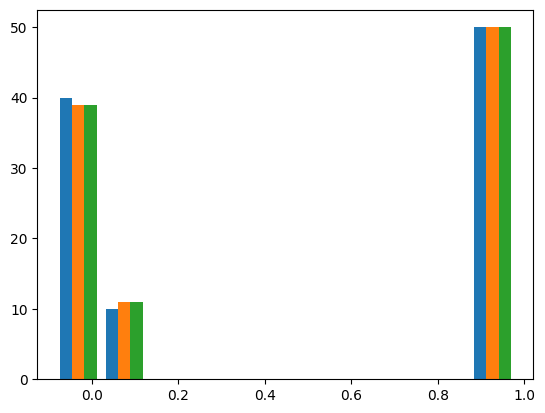

In [40]:
#plotten Sie ein histogram der Vorhersagen, den Mittelwert der Gradienten pro Vorhersage, plotten Sie dann den Fehler vs. die Gradienten
import matplotlib.pyplot as plt
plt.hist(preds)

(array([32., 38., 17.,  6.,  0.,  0.,  1.,  4.,  1.,  1.]),
 array([-0.06486341,  0.00810303,  0.08106947,  0.15403591,  0.22700235,
         0.29996878,  0.37293524,  0.44590169,  0.51886809,  0.59183455,
         0.664801  ]),
 <BarContainer object of 10 artists>)

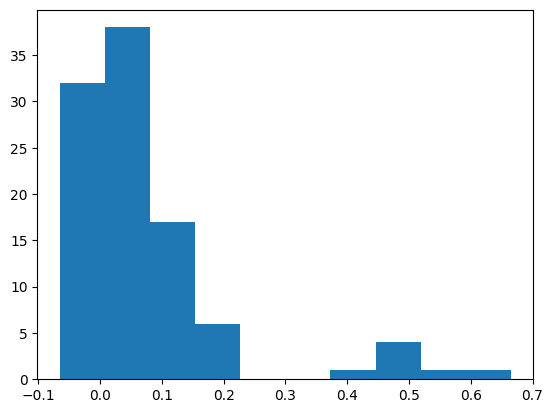

In [41]:
mean_gradients = np.mean(gradients, axis=1)
plt.hist(mean_gradients, bins=10)

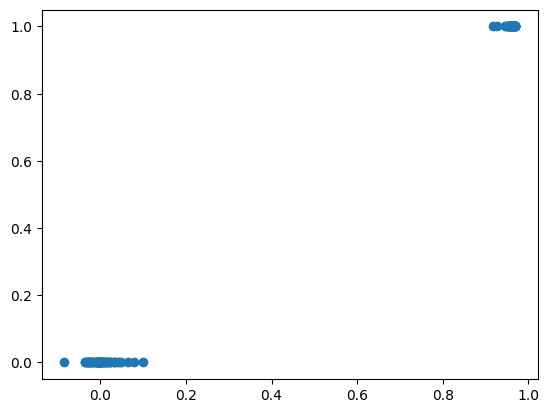

In [42]:
plt.scatter(preds[:, 0], y)

(array([[27.,  8., 13., 22., 11.,  6.,  3.,  2.,  2.,  0.,  0.,  0.,  1.,
          0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  1.],
        [27., 31., 15.,  9.,  5.,  1.,  4.,  1.,  0.,  2.,  1.,  1.,  0.,
          0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [24., 33., 18.,  5.,  4.,  1.,  6.,  1.,  3.,  1.,  0.,  2.,  1.,
          1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.]]),
 array([8.14457621e-08, 3.33172109e-04, 6.66262773e-04, 9.99353436e-04,
        1.33244410e-03, 1.66553476e-03, 1.99862543e-03, 2.33171609e-03,
        2.66480675e-03, 2.99789742e-03, 3.33098808e-03, 3.66407875e-03,
        3.99716941e-03, 4.33026007e-03, 4.66335074e-03, 4.99644140e-03,
        5.32953206e-03, 5.66262273e-03, 5.99571339e-03, 6.32880405e-03,
        6.66189472e-03, 6.99498538e-03, 7.32807604e-03, 7.66116671e-03,
        7.99425737e-03, 8.327348

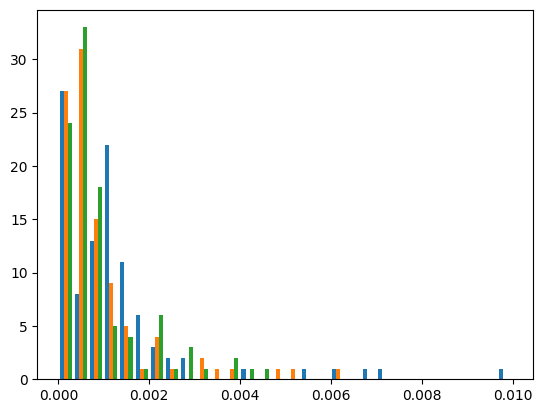

In [43]:
plt.hist((preds - y)**2, bins=30)

In [44]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

In [45]:
num_classes = 2
img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_picks = np.logical_or(y_train==2,y_train==7)
test_picks = np.logical_or(y_test==2,y_test==7)

x_train = x_train[train_picks]
x_test = x_test[test_picks]

y_train = np.array(y_train[train_picks]==7,dtype=int)
y_test = np.array(y_test[test_picks]==7,dtype=int)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (12223, 28, 28, 1)
12223 train samples
2060 test samples


In [46]:
model = Sequential()

model.add(Conv2D(32, [3, 3], input_shape = input_shape)) 
model.add(Activation("relu"))
model.add(Conv2D(64, [3, 3],))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
hist = model.fit(x_train[:2], y_train[:2], batch_size=64, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 0.7488 - val_accuracy: 0.9340 - val_loss: 0.6369
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 1.0000 - loss: 0.4701 - val_accuracy: 0.9481 - val_loss: 0.5849
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 1.0000 - loss: 0.4833 - val_accuracy: 0.9471 - val_loss: 0.5214
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 1.0000 - loss: 0.4370 - val_accuracy: 0.9388 - val_loss: 0.4530
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 1.0000 - loss: 0.1994 - val_accuracy: 0.9471 - val_loss: 0.3867
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 1.0000 - loss: 0.1991 - val_accuracy: 0.9388 - val_loss: 0.3333
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 1.0000 - loss: 0.2639 - val_accuracy: 0.9146 - val_loss: 0.3027
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 1.0000 - loss: 0.0195 - val_accuracy: 0.8951 - val_loss

In [48]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8459 - loss: 0.3478
Test score: 0.2831687927246094
Test accuracy: 0.8762136101722717


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


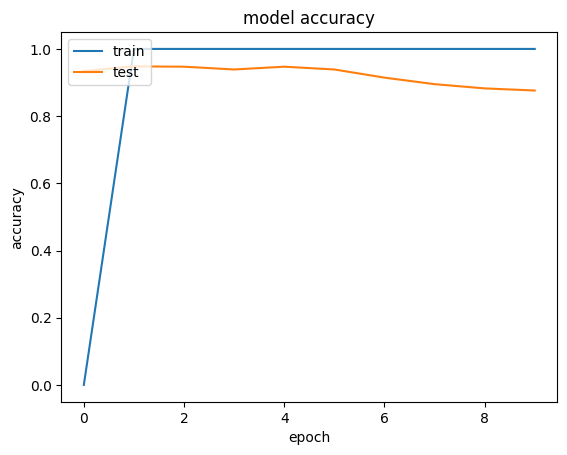

In [49]:
import matplotlib.pyplot as plt
# list all keys in history
print(hist.history.keys())

# visualize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<class 'numpy.ndarray'> (3, 3, 32)
Filter 1 in the first convolution layer : 
[[ 0.13265996  0.04720598  0.10848507]
 [ 0.13015231 -0.04644601 -0.13235413]
 [-0.00348388 -0.03121396  0.13600525]]


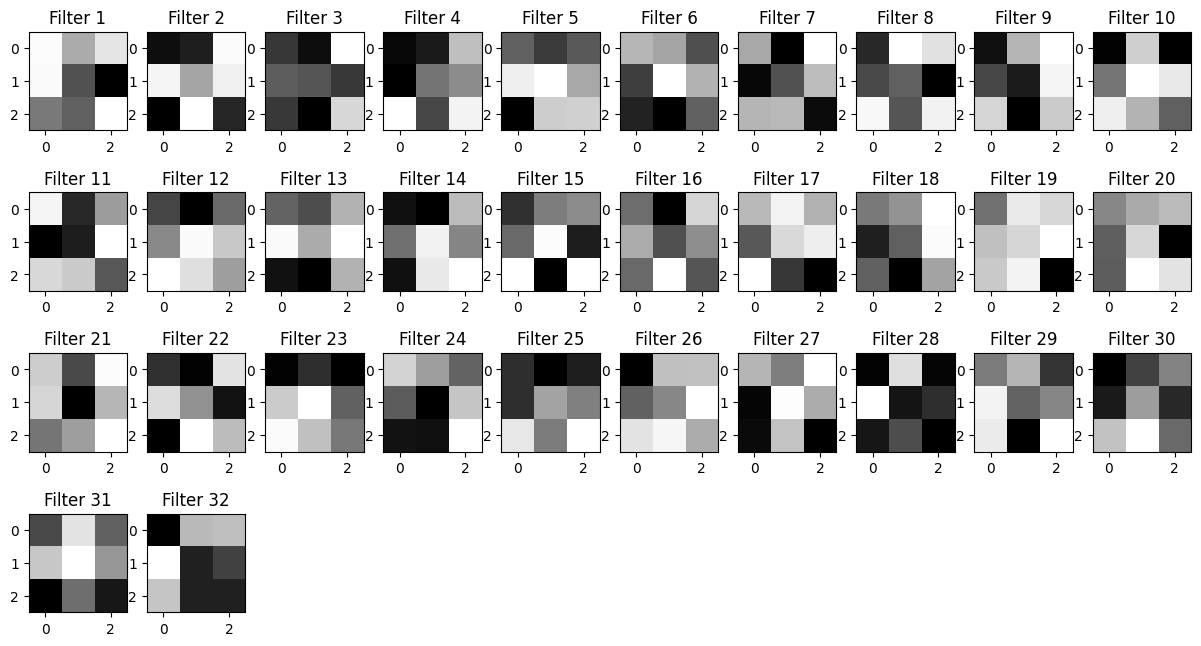

In [50]:
# get the weights of the first convolution layer and visualize the 32 filters
W1 = model.layers[0].get_weights()[0]
W1 = model.layers[0].get_weights()[0][:,:,0,:]

print(type(W1), W1.shape)
print("Filter 1 in the first convolution layer : ")
print(W1[:,:,0])

plt.figure(1, figsize=(15,8))

for i in range(0,32):
    plt.subplot(4,10,i+1)
    plt.title('Filter ' + str(i+1))
    plt.imshow(W1[:,:,i],interpolation="nearest",cmap="gray")
    
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
(26, 26, 32)


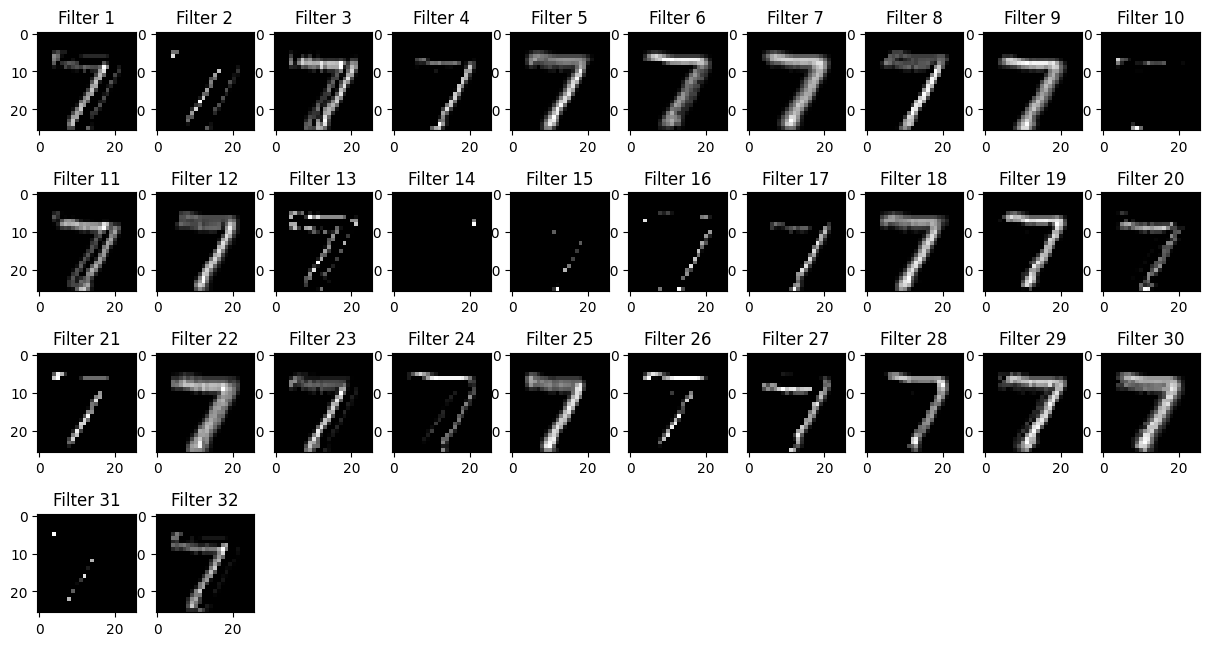

In [51]:
# extract output of the first convolution layer and plot the images from the 32 filters
model2 = Sequential()
model2.add(Conv2D(32, [3, 3])) #, border_mode='same', weights=model.layers[0].get_weights(), input_shape=input_shape))
model2.add(Activation("relu"))

x_rep = model2.predict(x_test[0:10]) # representation of the first 10 test samples
x_rep_1 = x_rep[0,:,:,:]  # only look into the first test sample, which is a 7 digit
print(x_rep_1.shape)

plt.figure(1, figsize=(15,8))

for i in range(0,32):
    plt.subplot(4,10,i+1)
    plt.title('Filter ' + str(i+1))
    plt.imshow(x_rep_1[:,:,i],interpolation="nearest",cmap="gray")
    
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
(24, 24, 64)


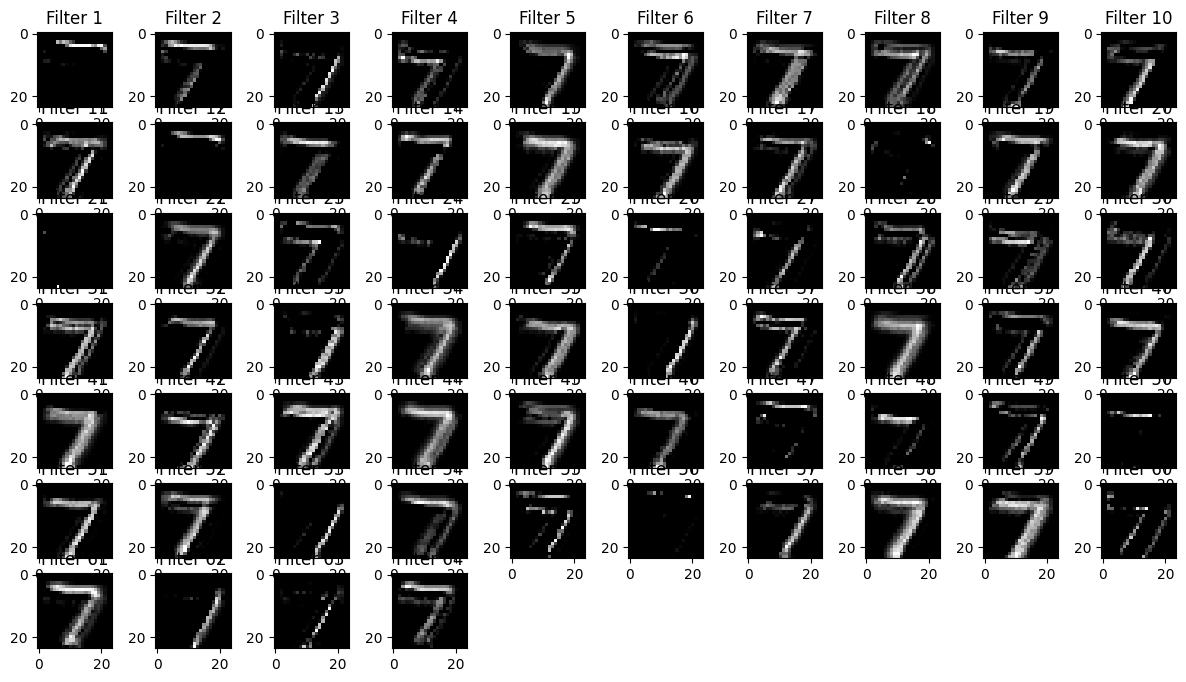

In [52]:
# extract output of the second convolution layer and plot the images from the 64 filters
model3 = Sequential()
model3.add(Conv2D(32, [3, 3])) #, border_mode='same', weights=model.layers[0].get_weights(), input_shape=input_shape))
model3.add(Activation("relu"))
model3.add(Conv2D(64, [3, 3])) #, border_mode='same', weights=model.layers[2].get_weights()))
model3.add(Activation("relu"))

x_rep = model3.predict(x_test[0:10]) # representation of the first 10 test samples
x_rep_1 = x_rep[0,:,:,:]  # only look into the first test sample, which is a 7 digit
print(x_rep_1.shape)

plt.figure(1, figsize=(15,8))

for i in range(0,64):
    plt.subplot(7,10,i+1)
    plt.title('Filter ' + str(i+1))
    plt.imshow(x_rep_1[:,:,i],interpolation="nearest",cmap="gray")
    
plt.show()